In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
from datetime import datetime

# 1. Data Collection

In [2]:
now=datetime.now()

start= datetime(now.year-10, now.month, now.day)
end=now
ticker='AAPL'
df=yf.download(ticker, start, end)
df

C:\Users\Ayon\AppData\Local\Temp\ipykernel_6680\4276809628.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800
2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400
2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200
...,...,...,...,...,...
2025-12-08,277.890015,279.670013,276.149994,278.130005,38211800
2025-12-09,277.179993,280.029999,276.920013,278.160004,32193300


# 2. Data Exploration and Visualization  

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2515, 5)

In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,113.070019,114.194291,111.830169,112.958860,1.024310e+08
std,72.788952,73.485716,72.011982,72.706942,5.830208e+07
min,20.604076,20.907414,20.405654,20.526533,2.013560e+07
25%,41.304392,41.560254,40.905566,41.205926,6.231950e+07
50%,118.899651,120.493943,117.300802,119.062956,8.911160e+07
75%,171.264565,172.341642,169.266807,170.889632,1.249392e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [6]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-08,277.890015,279.670013,276.149994,278.130005,38211800
2025-12-09,277.179993,280.029999,276.920013,278.160004,32193300
2025-12-10,278.779999,279.750000,276.440002,277.750000,33038300
2025-12-11,278.029999,279.589996,273.809998,279.100006,33248000
2025-12-12,278.279999,279.220001,276.820007,277.899994,38360082


In [8]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800
2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400
2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200


In [9]:
df=df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800
1,2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
4,2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200


Text(0, 0.5, 'Close Price')

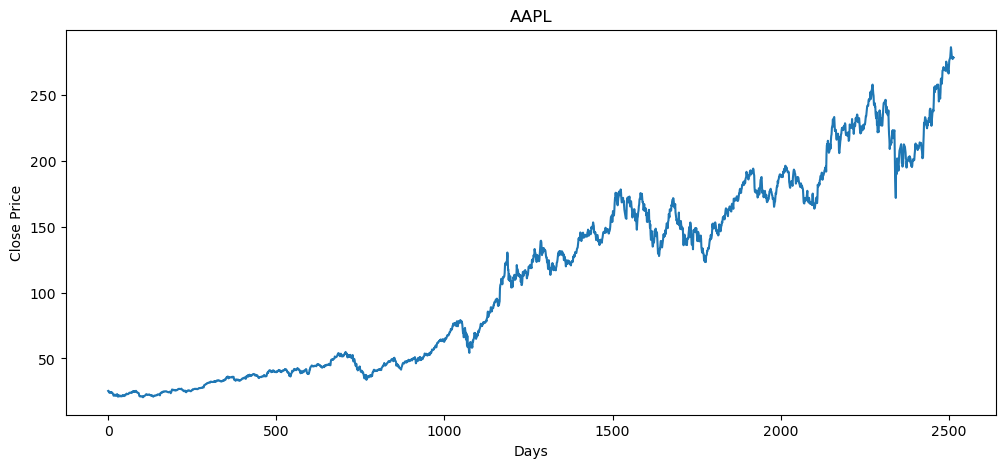

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

# 100 days Moving Average 

In [12]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800,NaN
1,2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN
4,2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200,NaN


In [13]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800,NaN
1,2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN
4,2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200,NaN
...,...,...,...,...,...,...,...
98,2016-05-05,21.265491,21.454792,21.137771,21.438827,143562000,NaN
99,2016-05-06,21.146893,21.313385,20.948469,21.295140,174799600,23.077276
100,2016-05-09,21.162853,21.386363,21.117238,21.210748,131745600,23.035297


Text(0, 0.5, 'Price')

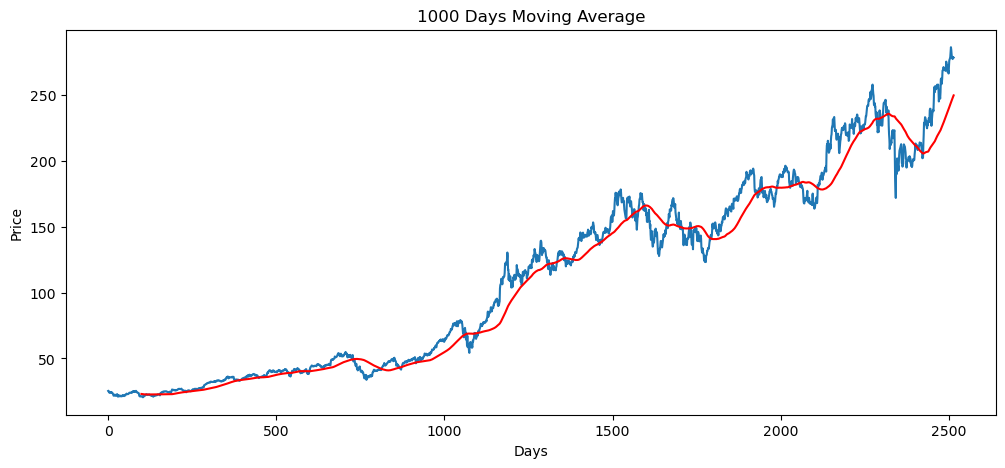

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] ,'r')
plt.title('1000 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

# 200 days moving average 

In [15]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-12-14,25.360746,25.405839,24.754234,25.293105,257274800,NaN,NaN
1,2015-12-15,24.912062,25.432896,24.880496,25.238993,213292400,NaN,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN,NaN
4,2015-12-18,23.906473,24.693359,23.856870,24.555825,385813200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-09-27,25.932457,25.953096,25.760476,25.911820,98429600,23.269414,NaN
199,2016-09-28,26.129665,26.287889,26.010426,26.070047,118564400,23.319241,23.198259
200,2016-09-29,25.723789,26.095269,25.636653,25.948512,143548000,23.364851,23.200074


Text(0, 0.5, 'Price')

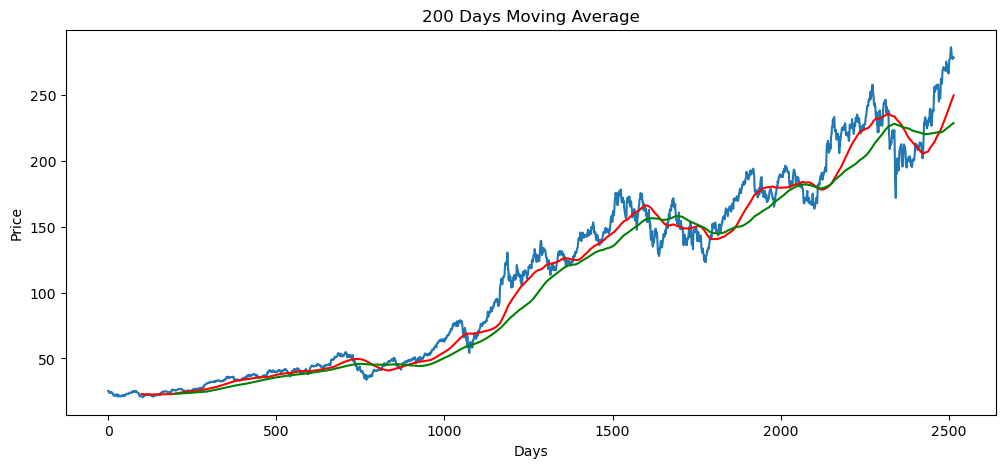

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] ,'r')
plt.plot(df['MA_200'] ,'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

# Calculating % changed in each trading session

In [17]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.360746,NaN
1,24.912062,-0.017692
2,25.103710,0.007693
3,24.571604,-0.021196
4,23.906473,-0.027069
...,...,...
2510,277.890015,-0.003192
2511,277.179993,-0.002555
2512,278.779999,0.005772


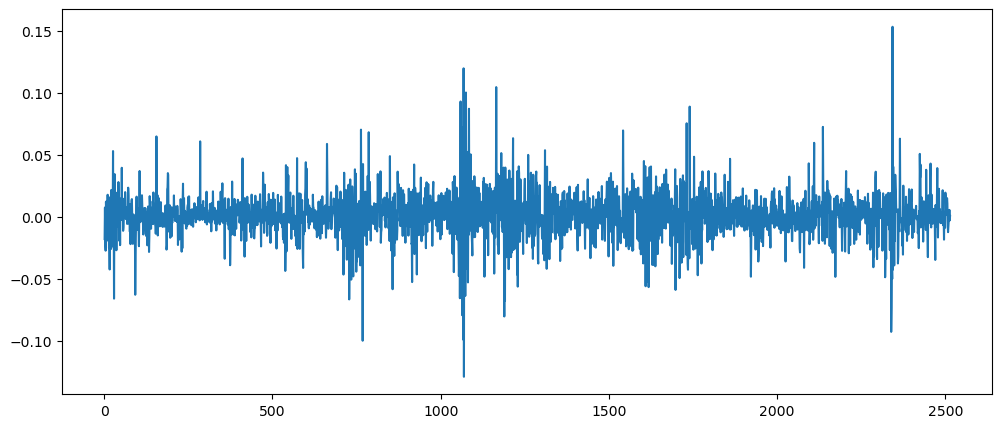

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

In [19]:
import sys
print(sys.executable)


C:\Users\Ayon\miniconda3\envs\stockenv\python.exe


# 4. Data Preprocessing

In [20]:
# Splitting data into training & testing datasets
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])  

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.360746
1        24.912062
2        25.103710
3        24.571604
4        23.906473
...            ...
1755    145.613266
1756    144.450790
1757    140.786072
1758    138.845352
1759    140.529938

[1760 rows x 1 columns]
Ticker        AAPL
1760    140.047226
1761    142.342606
1762    143.308044
1763    141.081619
1764    134.471329
...            ...
2510    277.890015
2511    277.179993
2512    278.779999
2513    278.029999
2514    278.279999

[755 rows x 1 columns]


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03016923],
       [0.02732344],
       [0.02853898],
       ...,
       [0.76225562],
       [0.74994658],
       [0.76063109]], shape=(1760, 1))

In [23]:
type(data_training_array)

numpy.ndarray

# 5. Sequence Creation 

In [24]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train

array([[[0.03016923],
        [0.02732344],
        [0.02853898],
        ...,
        [0.00474473],
        [0.00419503],
        [0.00344282]],

       [[0.02732344],
        [0.02853898],
        [0.02516409],
        ...,
        [0.00419503],
        [0.00344282],
        [0.00354405]],

       [[0.02853898],
        [0.02516409],
        [0.02094549],
        ...,
        [0.00344282],
        [0.00354405],
        [0.00445537]],

       ...,

       [[0.80476455],
        [0.78545394],
        [0.80993478],
        ...,
        [0.79599618],
        [0.79287215],
        [0.78549914]],

       [[0.78545394],
        [0.80993478],
        [0.82264254],
        ...,
        [0.79287215],
        [0.78549914],
        [0.76225562]],

       [[0.80993478],
        [0.82264254],
        [0.83703223],
        ...,
        [0.78549914],
        [0.76225562],
        [0.74994658]]], shape=(1660, 100, 1))

In [26]:
x_train.ndim

3

In [27]:
y_train.ndim

1

In [28]:
x_train.shape

(1660, 100, 1)

In [29]:
y_train.shape

(1660,)

# 6. Model Training 

In [30]:
import sys
print(sys.version)

3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]


In [31]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [32]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [33]:
model=Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model training 

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0159
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.4571e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.9414e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.8305e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.1245e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.4627e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.1892e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.5336e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.8132e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.5920e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.5519e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.0229e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.3216e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.8915e-04
Epoch 15/50
52/52 ━

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [36]:
# Save the trained model 
model.save('stock_prediction_model.keras') 

# 8. Preparing Test Data

In [37]:
data_training.tail(100)

Ticker,AAPL
1660,150.307053
1661,152.575821
1662,151.338272
1663,150.218674
1664,148.892776
...,...
1755,145.613266
1756,144.450790
1757,140.786072
1758,138.845352


In [38]:
data_testing

Ticker,AAPL
1760,140.047226
1761,142.342606
1762,143.308044
1763,141.081619
1764,134.471329
...,...
2510,277.890015
2511,277.179993
2512,278.779999
2513,278.029999


In [39]:
past_100_days=data_training.tail(100)
past_100_days

Ticker,AAPL
1660,150.307053
1661,152.575821
1662,151.338272
1663,150.218674
1664,148.892776
...,...
1755,145.613266
1756,144.450790
1757,140.786072
1758,138.845352


In [40]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,150.307053
1,152.575821
2,151.338272
3,150.218674
4,148.892776
...,...
850,277.890015
851,277.179993
852,278.779999
853,278.029999


In [41]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.66505798e-01],
       [1.80422226e-01],
       [1.72831209e-01],
       [1.65963690e-01],
       [1.57830752e-01],
       [1.89097273e-01],
       [1.92470944e-01],
       [2.23556637e-01],
       [2.17532138e-01],
       [2.08495623e-01],
       [2.45364712e-01],
       [2.43437101e-01],
       [2.42049445e-01],
       [2.39153863e-01],
       [2.39455430e-01],
       [2.65517073e-01],
       [2.60992264e-01],
       [2.82770575e-01],
       [2.89346168e-01],
       [2.88380912e-01],
       [2.97550801e-01],
       [2.95137520e-01],
       [2.79271486e-01],
       [2.55442203e-01],
       [2.53391045e-01],
       [2.55200819e-01],
       [2.70282705e-01],
       [2.31612827e-01],
       [2.18099611e-01],
       [2.03198833e-01],
       [1.93003225e-01],
       [1.97467477e-01],
       [1.84497119e-01],
       [1.76775161e-01],
       [1.85402006e-01],
       [1.76352855e-01],
       [1.93908112e-01],
       [2.30466649e-01],
       [1.72612662e-01],
       [1.81480798e-01],


In [42]:
input_data.shape

(855, 1)

In [43]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [44]:
x_test

array([[[0.1665058 ],
        [0.18042223],
        [0.17283121],
        ...,
        [0.10810493],
        [0.09620072],
        [0.10653383]],

       [[0.18042223],
        [0.17283121],
        [0.16596369],
        ...,
        [0.09620072],
        [0.10653383],
        [0.10357291]],

       [[0.17283121],
        [0.16596369],
        [0.15783075],
        ...,
        [0.10653383],
        [0.10357291],
        [0.11765257]],

       ...,

       [[0.54513098],
        [0.55688328],
        [0.55535308],
        ...,
        [0.95454768],
        [0.9490886 ],
        [0.94473338]],

       [[0.55688328],
        [0.55535308],
        [0.55296591],
        ...,
        [0.9490886 ],
        [0.94473338],
        [0.95454768]],

       [[0.55535308],
        [0.55296591],
        [0.55370045],
        ...,
        [0.94473338],
        [0.95454768],
        [0.94994725]]], shape=(755, 100, 1))

In [45]:
y_test

array([1.03572914e-01, 1.17652573e-01, 1.23574491e-01, 1.09917792e-01,
       6.93708448e-02, 5.73457133e-02, 4.44143845e-02, 4.39913302e-02,
       6.30258725e-02, 4.35683695e-02, 4.13323590e-02, 3.02744495e-02,
       6.16372342e-03, 2.77363576e-02, 2.96700059e-02, 3.02221760e-04,
       8.09741855e-03, 0.00000000e+00, 2.77969611e-02, 3.09994447e-02,
       3.45041502e-02, 5.11823175e-02, 5.06988001e-02, 5.88564477e-02,
       6.59868783e-02, 6.15756948e-02, 6.19383796e-02, 7.76494185e-02,
       9.72279413e-02, 1.05808830e-01, 1.01760051e-01, 1.14449715e-01,
       1.26353920e-01, 1.08648723e-01, 1.16443873e-01, 1.23332545e-01,
       1.55903047e-01, 1.78140260e-01, 1.61401910e-01, 1.79046832e-01,
       1.62550053e-01, 1.56205175e-01, 1.58444368e-01, 1.75632259e-01,
       1.71698228e-01, 1.84589124e-01, 1.74784840e-01, 1.67764479e-01,
       1.43133077e-01, 1.45735329e-01, 1.48700547e-01, 1.32421005e-01,
       1.39743682e-01, 1.36657352e-01, 1.23948033e-01, 1.27579374e-01,
      

# 9. Making Predictions

In [46]:
y_predicted=model.predict(x_test)
y_predicted

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


array([[0.10647897],
       [0.10287598],
       [0.10498369],
       [0.11008516],
       [0.11096795],
       [0.09904242],
       [0.08323735],
       [0.06724556],
       [0.05545658],
       [0.05299778],
       [0.0496175 ],
       [0.04629958],
       [0.04116528],
       [0.03086584],
       [0.02647113],
       [0.02577865],
       [0.01963657],
       [0.01481229],
       [0.00978929],
       [0.01233655],
       [0.01796228],
       [0.0242093 ],
       [0.03316522],
       [0.04078928],
       [0.04793331],
       [0.0548046 ],
       [0.05860288],
       [0.06031859],
       [0.06483427],
       [0.0742657 ],
       [0.08525546],
       [0.09271735],
       [0.10031076],
       [0.10908601],
       [0.11077343],
       [0.11174941],
       [0.11410408],
       [0.12551868],
       [0.14325887],
       [0.15292527],
       [0.16231692],
       [0.16353835],
       [0.15981716],
       [0.15636456],
       [0.15927228],
       [0.16209945],
       [0.16810343],
       [0.170

In [47]:
y_test

array([1.03572914e-01, 1.17652573e-01, 1.23574491e-01, 1.09917792e-01,
       6.93708448e-02, 5.73457133e-02, 4.44143845e-02, 4.39913302e-02,
       6.30258725e-02, 4.35683695e-02, 4.13323590e-02, 3.02744495e-02,
       6.16372342e-03, 2.77363576e-02, 2.96700059e-02, 3.02221760e-04,
       8.09741855e-03, 0.00000000e+00, 2.77969611e-02, 3.09994447e-02,
       3.45041502e-02, 5.11823175e-02, 5.06988001e-02, 5.88564477e-02,
       6.59868783e-02, 6.15756948e-02, 6.19383796e-02, 7.76494185e-02,
       9.72279413e-02, 1.05808830e-01, 1.01760051e-01, 1.14449715e-01,
       1.26353920e-01, 1.08648723e-01, 1.16443873e-01, 1.23332545e-01,
       1.55903047e-01, 1.78140260e-01, 1.61401910e-01, 1.79046832e-01,
       1.62550053e-01, 1.56205175e-01, 1.58444368e-01, 1.75632259e-01,
       1.71698228e-01, 1.84589124e-01, 1.74784840e-01, 1.67764479e-01,
       1.43133077e-01, 1.45735329e-01, 1.48700547e-01, 1.32421005e-01,
       1.39743682e-01, 1.36657352e-01, 1.23948033e-01, 1.27579374e-01,
      

In [48]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [49]:
y_predicted

array([140.521   , 139.93361 , 140.27722 , 141.1089  , 141.25282 ,
       139.30862 , 136.73196 , 134.12485 , 132.20291 , 131.80206 ,
       131.25098 , 130.71007 , 129.87303 , 128.19394 , 127.47748 ,
       127.36458 , 126.36325 , 125.57676 , 124.757866, 125.17314 ,
       126.090294, 127.10873 , 128.5688  , 129.81172 , 130.97641 ,
       132.09662 , 132.71585 , 132.99556 , 133.73174 , 135.26932 ,
       137.06097 , 138.27747 , 139.5154  , 140.94601 , 141.22112 ,
       141.38023 , 141.7641  , 143.625   , 146.51715 , 148.09305 ,
       149.62415 , 149.82327 , 149.21661 , 148.65375 , 149.12778 ,
       149.5887  , 150.5675  , 150.9163  , 150.61765 , 148.99255 ,
       147.61775 , 146.8848  , 145.80008 , 145.30415 , 145.00078 ,
       144.26108 , 143.78094 , 144.97896 , 147.19112 , 148.42528 ,
       149.33664 , 149.15535 , 148.0518  , 147.57632 , 148.05917 ,
       148.82256 , 150.31647 , 151.32553 , 152.60797 , 154.14552 ,
       154.7985  , 155.30884 , 156.01385 , 155.90364 , 155.392

In [50]:
y_test

array([140.04722595, 142.34260559, 143.30804443, 141.08161926,
       134.47132874, 132.51089478, 130.40272522, 130.33375549,
       133.43692017, 130.26480103, 129.90026855, 128.09751892,
       124.16679382, 127.68373871, 127.99897766, 123.21120453,
       124.48204041, 123.1619339 , 127.69361877, 128.2157135 ,
       128.78707886, 131.50608826, 131.42726135, 132.75718689,
       133.91964722, 133.20050049, 133.2596283 , 135.82096863,
       139.01281738, 140.41174316, 139.75167847, 141.82044983,
       143.76116943, 140.87472534, 142.14555359, 143.26860046,
       148.57850647, 152.20379639, 149.47497559, 152.35159302,
       149.66215515, 148.62776184, 148.99281311, 151.79492188,
       151.15356445, 153.25514221, 151.6567688 , 150.51225281,
       146.49664307, 146.92088318, 147.40429688, 144.75027466,
       145.94407654, 145.44091797, 143.36894226, 143.96095276,
       149.01257324, 151.77513123, 149.57493591, 150.82795715,
       148.57841492, 146.51634216, 148.46002197, 150.55

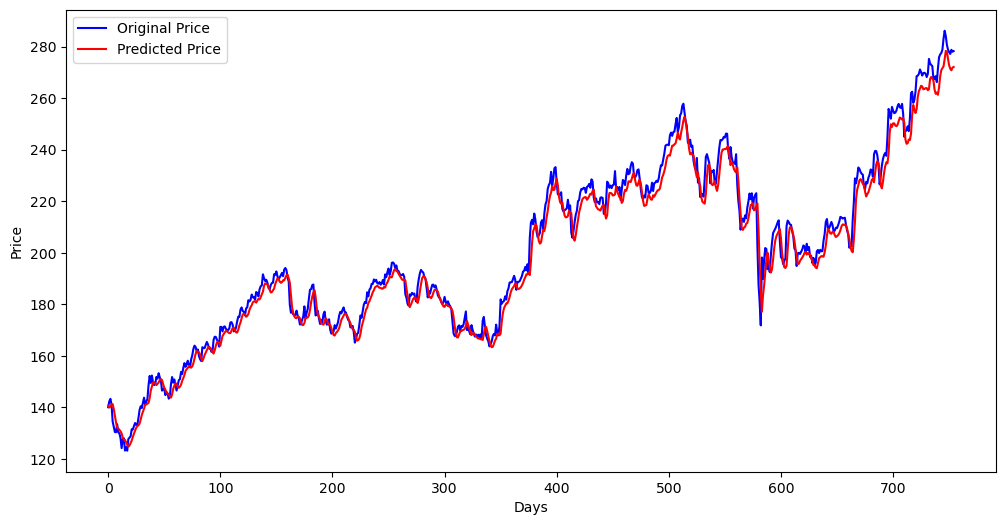

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()


(140.0, 220.0)

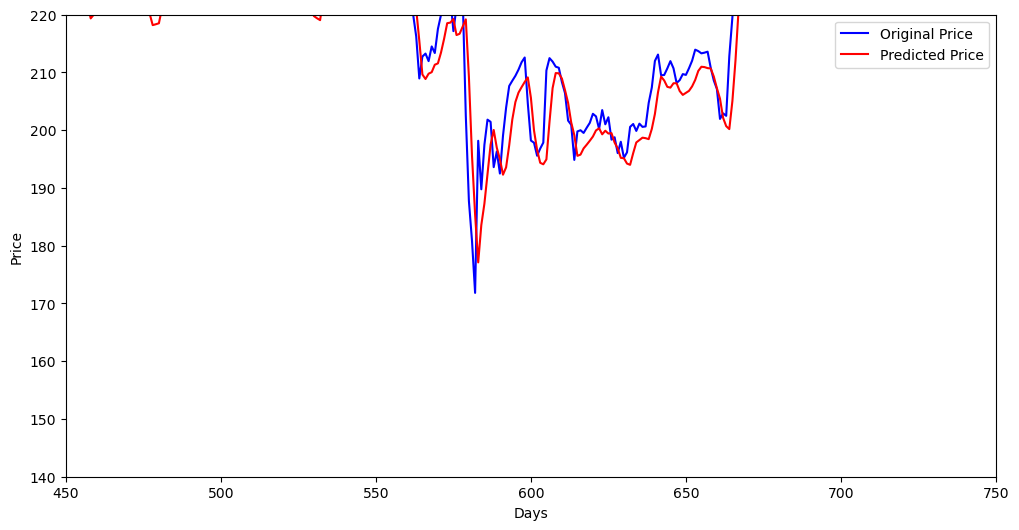

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation 

In [53]:
# Mean Squared Error (MSE) 
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE): {mse}") 

Mean Squared Error (MSE): 23.651104634818047


In [55]:
# Root Mean Squared Error (MSE) 

In [56]:
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}") 

Root Mean Squared Error (RMSE): 4.863240137482216


In [57]:
# R-Squared 
r2=r2_score(y_test,y_predicted)
print(f"R-Squared: {r2}") 

R-Squared: 0.9801172498175619
